# Looking at temperature changes over time

In [21]:
import h5py
import matplotlib.pyplot as plt

In [2]:
fdq_eng = h5py.File("/mn/stornext/d16/cmbco/ola/firas/initial_data/fdq_eng_new.h5")

## Sorting out times

In [11]:
gmt = fdq_eng['ct_head/gmt']

gmt_nb = [gmt[i].decode() for i in range(len(gmt))]
gmt_nb[0]

'89324150108069'

In [76]:
from datetime import datetime, timedelta

def parse_date_string(gmt_nb):
    print(gmt_nb)

    # Split the string into components
    year = int(gmt_nb[:2])
    day_of_year = int(gmt_nb[2:5])
    hour = int(gmt_nb[5:7])
    minute = int(gmt_nb[7:9])
    second = int(gmt_nb[9:11])
    milliseconds = int(gmt_nb[11:])

    # Compute the date from the year and day of the year
    base_date = datetime(year=year + 1900, month=1, day=1)
    date = base_date + timedelta(year=year - 1989, days=day_of_year - 1)

    # Construct the complete datetime with time components
    final_date = datetime(
        year=date.year, 
        month=date.month, 
        day=date.day,
        hour=hour, 
        minute=minute, 
        second=second, 
        microsecond=milliseconds * 1000  # converting ms to microseconds
    )

    return final_date

parsed_dates = []

for date in gmt_nb:
    parsed_dates.append(parse_date_string(date))

for date in parsed_dates:
    print(date)


89324150108069


TypeError: 'years' is an invalid keyword argument for __new__()

In [23]:
t = [int(gmt_nb[i]) for i in range(len(gmt_nb))]

## Bolometer assembly temperatures

In [4]:
a_hi_bol_assem = fdq_eng['en_analog/grt/a_hi_bol_assem']
a_lo_bol_assem = fdq_eng['en_analog/grt/a_lo_bol_assem']
b_hi_bol_assem = fdq_eng['en_analog/grt/b_hi_bol_assem']
b_lo_bol_assem = fdq_eng['en_analog/grt/b_lo_bol_assem']

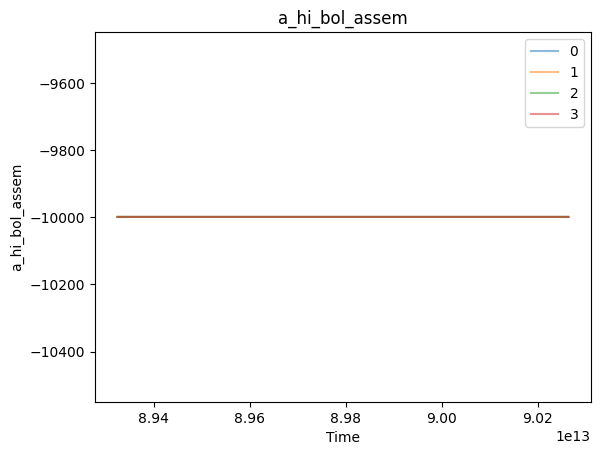

In [41]:
for i in range(len(a_hi_bol_assem[0])):
    plt.plot(t, a_hi_bol_assem[:,i], label=f'{i}', alpha=0.5)

plt.xlabel('Time')
plt.ylabel('a_hi_bol_assem')
plt.title('a_hi_bol_assem')
plt.legend()
plt.show()
plt.close()

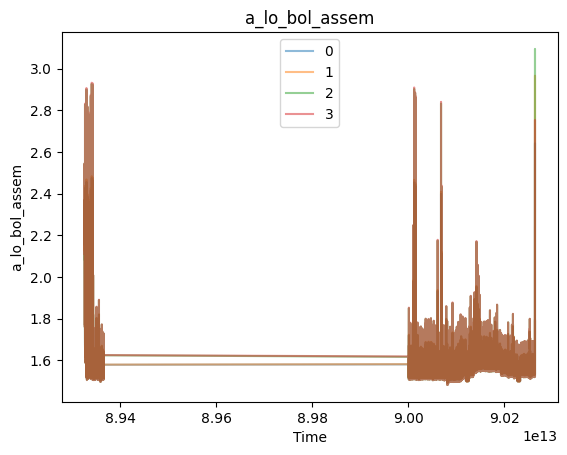

In [46]:
for i in range(len(a_hi_bol_assem[0])):
    plt.plot(t, a_lo_bol_assem[:,i], label=i, alpha=0.5)
plt.xlabel('Time')
plt.ylabel('a_lo_bol_assem')
plt.title('a_lo_bol_assem')
plt.legend()
plt.show()
plt.close()

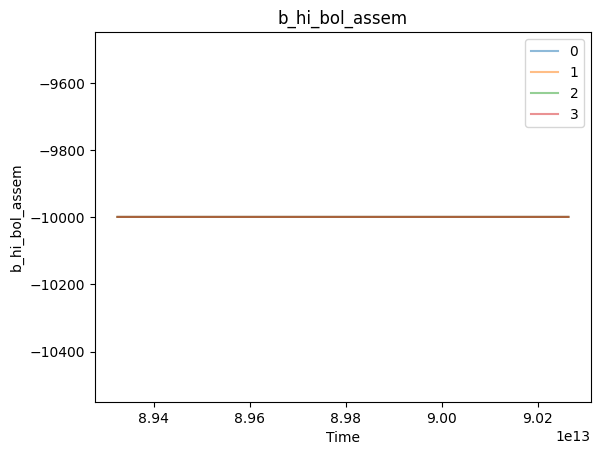

In [43]:
for i in range(len(a_hi_bol_assem[0])):
    plt.plot(t, b_hi_bol_assem[:,i], label=i, alpha=0.5)
    
plt.xlabel('Time')
plt.ylabel('b_hi_bol_assem')
plt.title('b_hi_bol_assem')
plt.legend()
plt.show()
plt.close()

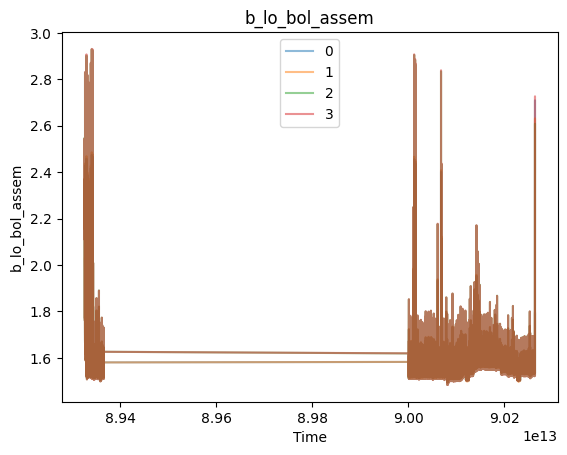

In [44]:
for i in range(len(a_hi_bol_assem[0])):
    plt.plot(t, b_lo_bol_assem[:,i], label=i, alpha=0.5)

plt.xlabel('Time')
plt.ylabel('b_lo_bol_assem')
plt.title('b_lo_bol_assem')
plt.legend()
plt.show()
plt.close()

## Collimators

In [51]:
a_hi_collimator = fdq_eng['en_analog/grt/a_hi_collimator']
a_lo_collimator = fdq_eng['en_analog/grt/a_lo_collimator']
b_hi_collimator = fdq_eng['en_analog/grt/b_hi_collimator']
b_lo_collimator = fdq_eng['en_analog/grt/b_lo_collimator']

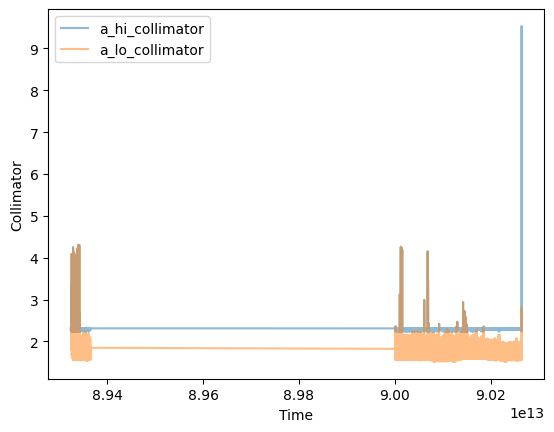

In [55]:
plt.plot(t, a_hi_collimator, label='a_hi_collimator', alpha=0.5)
plt.plot(t, a_lo_collimator, label='a_lo_collimator', alpha=0.5)
# plt.plot(t, b_hi_collimator, label='b_hi_collimator')
# plt.plot(t, b_lo_collimator, label='b_lo_collimator')
plt.xlabel('Time')
plt.ylabel('Collimator')
plt.legend()
plt.show()

## Dihedrals

In [56]:
a_hi_dihedral = fdq_eng['en_analog/grt/a_hi_dihedral']
a_lo_dihedral = fdq_eng['en_analog/grt/a_lo_dihedral']
b_hi_dihedral = fdq_eng['en_analog/grt/b_hi_dihedral']
b_lo_dihedral = fdq_eng['en_analog/grt/b_lo_dihedral']

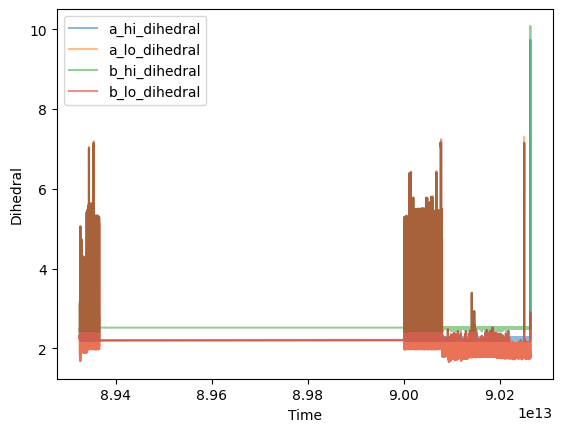

In [59]:
plt.plot(t, a_hi_dihedral, label='a_hi_dihedral', alpha=0.5)
plt.plot(t, a_lo_dihedral, label='a_lo_dihedral', alpha=0.5)
plt.plot(t, b_hi_dihedral, label='b_hi_dihedral', alpha=0.5)
plt.plot(t, b_lo_dihedral, label='b_lo_dihedral', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Dihedral')
plt.legend()
plt.show()